In [895]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scistats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, Lasso, RidgeCV, LassoCV, 
                                  ElasticNetCV, ElasticNet, 
                                  TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.svm import SVR, LinearSVR
from sklearn.decomposition import PCA
import re
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()

In [2095]:
# Base dataset
players_and_teams = pd.read_csv('Final_datasets/Cleaned_data/Players_and_teams.csv') # Done

In [2096]:
# Basic info and stats
basic_info = pd.read_csv('Final_datasets/Cleaned_data/Basic_info.csv') # Done
players_app_and_rank = pd.read_csv('Final_datasets/Cleaned_data/Appearences_with_ranking.csv') # Done
injuries_and_age = pd.read_csv('Final_datasets/Cleaned_data/Injuries_and_age.csv') # Done

In [2097]:
# Market value
market_value = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [2098]:
# Brand value
google_results = pd.read_csv('Final_datasets/Cleaned_data/final_google_results_cleaned.csv') # Done
twitter_thing = pd.read_csv('Final_datasets/Cleaned_data/final_twitter_cleaned.csv') # Done

In [2099]:
# Stats
stats = pd.read_csv('Final_datasets/Cleaned_data/final_stats_merged.csv') # Done

In [2100]:
# Awards
awards = pd.read_csv('Final_datasets/Cleaned_data/Awards_def.csv') # Done

### Merging previously created datasets

In [2101]:
players_and_teams.head()

,player,lastname,team,team_clas,league,team_country,player_link_tm,player_link_ws,team_ws_link,team_tm_link
0,Max Clark,Clark,Vitesse,Above 200,Eredivise (NET),NET,/max-clark/profil/spieler/183291,/Players/313996/Show/Max-Clark,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
1,Richonell Margaret,Margaret,Vitesse,Above 200,Eredivise (NET),NET,/richonell-margaret/profil/spieler/465326,/Players/369048/Show/Richonell-Margaret,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
2,Tim Matavz,Matavz,Vitesse,Above 200,Eredivise (NET),NET,/tim-matavz/profil/spieler/50303,/Players/25518/Show/Tim-Matavz,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
3,Alexander Büttner,Büttner,Vitesse,Above 200,Eredivise (NET),NET,/alexander-buttner/profil/spieler/38003,/Players/38147/Show/Alexander-Büttner,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
4,Rasmus Thelander,Thelander,Vitesse,Above 200,Eredivise (NET),NET,/rasmus-thelander/profil/spieler/129092,/Players/81841/Show/Rasmus-Thelander,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499


In [2102]:
# Merging basedataset with basic info

basic_info = basic_info.rename(columns = {'name':'player'})
final_dataset = players_and_teams.merge(basic_info, how='inner', on=['player', 'team'])
final_dataset.shape

(1198, 16)

In [2103]:
market_value.head()

,current_value,highest_value,last_team,prev_team,prev_prev_team,link,value_loss,current_log,double_trans
0,450000,450000,Vitesse,Hull City,Hull U23,/max-clark/profil/spieler/183291,0,13.017003,2.566256
1,2700000,2700000,Levante,Spezia Calcio,CD Leganés,/sergio-postigo/profil/spieler/158791,0,14.808762,2.695219
2,540000,630000,MSV Duisburg,VfL Osnabrück,Westf. Rhynern,/stanislav-iljutcenko/profil/spieler/191292,-90000,13.199324,2.580166
3,6750000,6750000,Boca Juniors,CD Cruz Azul,Lanús,/ivan-marcone/profil/spieler/90451,0,15.725053,2.755255
4,6300000,6300000,Montpellier,FC Metz,US Créteil,/florent-mollet/profil/spieler/222859,0,15.656060,2.750858


In [2104]:
# Merging market value

market_value.drop(['last_team','prev_team','prev_prev_team','current_value','value_loss'],axis=1,inplace=True)
market_value=market_value.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(market_value, how='inner', on='player_link_tm')

In [2105]:
# Merging player apps and rank

players_app_and_rank.columns = ['player_link_tm', 'nationality', 'minutes', 'type_agent', 'pond_min']
final_dataset = final_dataset.merge(players_app_and_rank, how='inner', on='player_link_tm')
final_dataset.shape

(1204, 23)

In [2106]:
# Merging injuries data

injuries_and_age=injuries_and_age.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(injuries_and_age, how='inner', on='player_link_tm')
final_dataset.shape

(1204, 27)

In [2107]:
# Merging google data

google_results=google_results.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(google_results, how='inner', on='player_link_tm')
final_dataset.shape

(1212, 30)

In [2108]:
# Some extra cleaning for the twitter data

twitter_thing['player_link_clean'] = [str(x).replace('0 ','') for x in twitter_thing.Link]
twitter_thing.drop(['Link','Positive','Negative','Neutral','Keyword'], axis=1, inplace=True)
final_dataset.shape

(1212, 30)

In [2109]:
# Merging twitter data

twitter_thing['player_link_ws'] = [re.findall(r'\S+(?=\n1)', x)[0] for x in twitter_thing.player_link_clean]
twitter_thing.drop('player_link_clean',axis=1,inplace=True)
final_dataset = final_dataset.merge(twitter_thing, how='left', on='player_link_ws')
final_dataset.tw_index.fillna(0,inplace=True)
final_dataset.shape

(1212, 31)

In [2110]:
# Merging stats

stats=stats.rename(columns = {'link':'player_link_ws'})
final_dataset = final_dataset.merge(stats, how='inner', on='player_link_ws')
final_dataset.shape

(1155, 93)

In [2111]:
# Merging awards

awards=awards.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(awards, how='inner', on='player_link_tm')
final_dataset.shape

(1171, 116)

In [2113]:
final_dataset.drop_duplicates(subset=['player_link_tm','player_link_ws'], inplace=True)

### Droping and dummifying

In [2114]:
complete_dataset = final_dataset.copy()

In [2115]:
final_dataset = final_dataset.rename(columns = {'minutes':'nat_team_min', 
                                                'pond_min': 'nat_team_min_pond',
                                               'results': 'google_res',
                                               'res_stand': 'stand_goog_res'})

In [2116]:
final_dataset.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/final_with_clubes.csv',index=False)

In [2117]:
final_link_ws = final_dataset.pop('player_link_ws')

In [2118]:
final_link_tm = final_dataset.pop('player_link_tm')

In [2119]:
final_dataset.shape

(1140, 114)

In [2120]:
final_dataset.drop(['player','lastname','team','team_country',
                   'team_ws_link','team_tm_link','position','nationality','search','last_team_x',
                   'last_team_y', 'last_team', 'last_season'], axis=1, inplace=True)

In [2121]:
numeric_final_features = final_dataset.select_dtypes(np.number)

In [2122]:
string_final_features = final_dataset.select_dtypes(exclude=np.number)

In [2123]:
string_final_features.columns

Index(['team_clas', 'league', 'pos_def', 'pref_side', 'type_agent',
       'age_group'],
      dtype='object')

In [2124]:
dum_string_final_features = pd.get_dummies(string_final_features, drop_first=True)

In [2125]:
dum_final = pd.concat([dum_string_final_features, numeric_final_features], axis=1, ignore_index=False)

In [2126]:
dum_final.shape

(1140, 129)

In [2127]:
dum_final.reset_index(inplace=True,drop=True)

In [2128]:
dum_final.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/dum_final.csv', index=False)

In [2129]:
dum_final = pd.read_csv('/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/dum_final.csv')

In [2130]:
dum_final.shape

(1140, 129)

### Models on teams

Based on a project from Tilburg University about the same topic, I decided to create a dataset just with the dummy variables out of the last three teams were each player played

#### Simple linear regression

In [258]:
complete_market_value_df = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [259]:
complete_market_value_df.head()

,current_value,highest_value,last_team,prev_team,prev_prev_team,link,value_loss,current_log,double_trans
0,450000,450000,Vitesse,Hull City,Hull U23,/max-clark/profil/spieler/183291,0,13.017003,2.566256
1,2700000,2700000,Levante,Spezia Calcio,CD Leganés,/sergio-postigo/profil/spieler/158791,0,14.808762,2.695219
2,540000,630000,MSV Duisburg,VfL Osnabrück,Westf. Rhynern,/stanislav-iljutcenko/profil/spieler/191292,-90000,13.199324,2.580166
3,6750000,6750000,Boca Juniors,CD Cruz Azul,Lanús,/ivan-marcone/profil/spieler/90451,0,15.725053,2.755255
4,6300000,6300000,Montpellier,FC Metz,US Créteil,/florent-mollet/profil/spieler/222859,0,15.656060,2.750858


In [260]:
y_teams = complete_market_value_df.pop('current_log')

In [261]:
complete_market_value_df = complete_market_value_df[['last_team','prev_team','prev_prev_team']]

In [262]:
dum_complete_market_value_df = pd.get_dummies(complete_market_value_df,drop_first=True)

In [263]:
dum_complete_market_value_df.shape

(1200, 1639)

In [264]:
X_train_teams, X_test_teams, y_train_teams, y_test_teams = train_test_split(
dum_complete_market_value_df, y_teams, test_size = 0.20, random_state=123)

In [268]:
scaler = StandardScaler()
X_train_teams_std = scaler.fit_transform(X_train_teams)
X_test_teams_std = scaler.transform(X_test_teams)

In [269]:
reg_teams = LinearRegression()
reg_teams.fit(X_train_teams, y_train_teams)

scores = cross_val_score(reg_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', reg_teams.score(X_train_teams, y_train_teams))

print('Test score:', reg_teams.score(X_test_teams, y_test_teams))

Mean cross-validated training score: -3.851967926384291e+27
Training score: 0.8652943787405634
Test score: -4.10808403630116e+27


#### Ridge

In [270]:
def alpha_scores(model, alpha_values, X_train, y_train):
    scores = []
    for alpha in alpha_values:
        model_ = model(alpha)
        scores.append(np.mean(cross_val_score(
            model_, X_train, y_train, cv=5)))
    return scores

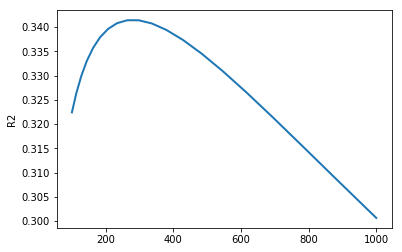

In [271]:
alpha_values = np.logspace(2,3,20)
scores = alpha_scores(Ridge, alpha_values, X_train_teams, y_train_teams)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [215]:
model_ridge_teams = RidgeCV(alphas=np.logspace(2,3,20), cv=5)

model_ridge_teams.fit(X_train_teams, y_train_teams)

print('Best alpha:', model_ridge_teams.alpha_)

print('Training score:', model_ridge_teams.score(X_train_teams, y_train_teams))

print('Test score:', model_ridge_teams.score(X_test_teams, y_test_teams))

scores = cross_val_score(model_ridge_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 263.6650898730358
Training score: 0.9493207456398254
Test score: 0.3282533385099068
Mean cross-validated training score: 0.33832415353733525


#### Lasso

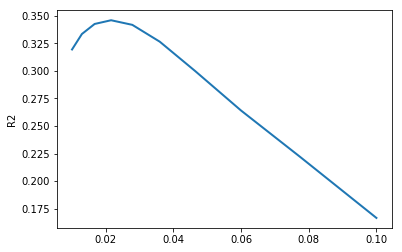

In [219]:
alpha_values = np.logspace(-2,-1,10)
scores = alpha_scores(Lasso, alpha_values, X_train_teams, y_train_teams)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [220]:
lasso_model_teams = LassoCV(alphas=np.logspace(-2,-1,10), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model_teams.fit(X_train_teams, y_train_teams)

print('Best alpha:', lasso_model_teams.alpha_)

print('Training score:', lasso_model_teams.score(X_train_teams, y_train_teams))

print('Test score:', lasso_model_teams.score(X_test_teams, y_test_teams))

scores = cross_val_score(lasso_model_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.016681005372000592
Training score: 0.888793855959153
Test score: 0.3682101993544653
Mean cross-validated training score: 0.4011296137536185


#### Feature importance

In [221]:
df_coef_teams = pd.DataFrame({'coef': lasso_model_teams.coef_,
                        'variable': X_train_teams.columns,
                        'coef_abs': np.abs(lasso_model_teams.coef_)})

df_coef_teams.sort_values(by='coef_abs', ascending=False).head()

,coef,variable,coef_abs
105,0.238912,last_team_FC Barcelona,0.238912
209,0.197091,last_team_RB Leipzig,0.197091
21,0.196315,last_team_Arsenal,0.196315
166,0.182069,last_team_Liverpool,0.182069
255,0.174962,last_team_Spurs,0.174962


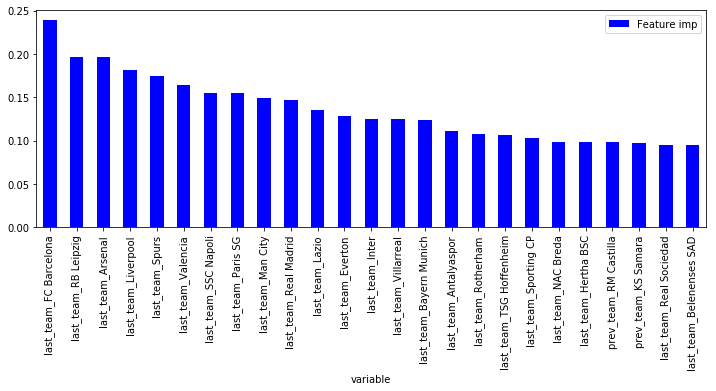

In [222]:
df_coef_teams.sort_values(by='coef_abs', ascending=False).head(25). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

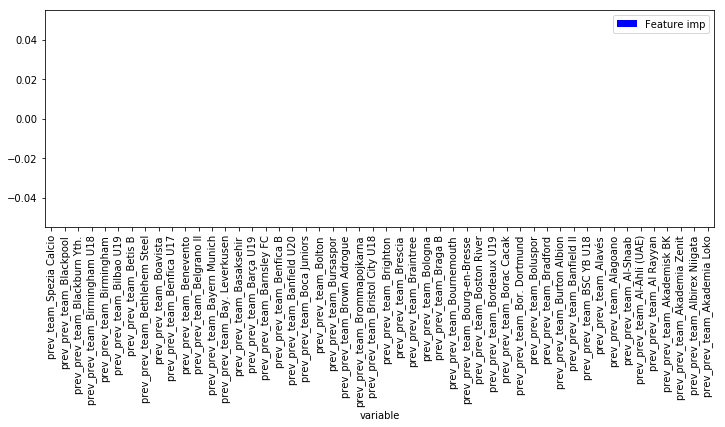

In [223]:
df_coef_teams.sort_values(by='coef_abs').head(50). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

In [224]:
df_coef_teams.sort_values(by='coef_abs', ascending=False, inplace=True)

In [225]:
df_coef_teams['order'] = [x for x in range(1,len(df_coef_teams)+1)]

In [226]:
shitty_vars_teams = df_coef_teams.variable[df_coef_teams.coef_abs == 0].values

In [227]:
cool_vars_teams = list(df_coef_teams.variable[~df_coef_teams.variable.isin(shitty_vars_teams)])

In [234]:
cool_cool_vars_teams = df_coef_teams.variable[df_coef_teams.coef_abs > 0.15].values

In [235]:
filtered_teams = dum_complete_market_value_df.loc[:,cool_cool_vars_teams]

In [236]:
filtered_teams.shape

(1200, 8)

#### Setting up data for mega dataset (used later)

In [396]:
for_link = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [397]:
y_teams_look = pd.concat([y_teams, for_link.link],axis=1)

In [398]:
filtered_teams_wlink = filtered_teams.copy()

In [399]:
filtered_teams_wlink['link'] = for_link.link

In [400]:
filtered_teams_wlink.shape

(1200, 9)

### Complete final dataset (all the features excepting teams)

#### Linear Regression

In [1559]:
y_2 = dum_final.pop('double_trans')

In [1560]:
y = dum_final.pop('current_log')

In [1561]:
X_train, X_test, y_train, y_test = train_test_split(
dum_final, y, test_size = 0.20, random_state=123)

In [1562]:
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [1563]:
simple_linear = LinearRegression()

simple_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1578]:
scores = cross_val_score(simple_linear, X_train, y_train, cv=5)
print('Mean cross-validated training score:',np.mean(scores))

Mean cross-validated training score: 0.6772519544733198


In [1579]:
print('Training score:', simple_linear.score(X_train, y_train))

print('Test score:', simple_linear.score(X_test, y_test))

Training score: 0.8189015878646291
Test score: 0.7266894981425448


In [1580]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
dum_final, y_2, test_size = 0.20, random_state=123)

In [1581]:
scaler = StandardScaler()
X_train_2_std = pd.DataFrame(scaler.fit_transform(X_train_2),columns=X_train.columns, index=X_train.index)
X_test_2_std = pd.DataFrame(scaler.transform(X_test_2),columns=X_train.columns, index=X_test.index)

In [1582]:
test_model = LinearRegression()
test_model.fit(X_train_2, y_train_2)

scores = cross_val_score(test_model, X_train_2, y_train_2, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', test_model.score(X_train_2, y_train_2))

print('Test score:', test_model.score(X_test_2, y_test_2))

Mean cross-validated training score: 0.6566721205858428
Training score: 0.8014235993343232
Test score: 0.6839832308493485


#### Ridge

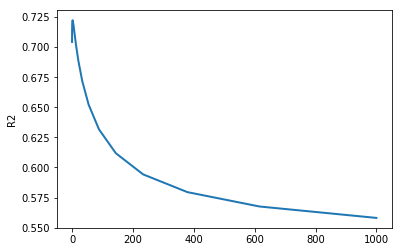

In [1598]:
alpha_values = np.logspace(-1,3,20)
scores = alpha_scores(Ridge, alpha_values, X_train, y_train)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [2262]:
# Best without standardization

model_ridge = RidgeCV(alphas=np.logspace(-1,4,20), cv=5)

model_ridge.fit(X_train, y_train)

print('Best alpha:', model_ridge.alpha_)

print('Training score:', model_ridge.score(X_train, y_train))

print('Test score:', model_ridge.score(X_test, y_test))

scores = cross_val_score(model_ridge, X_train, y_train, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 2.0691380811147893
Training score: 0.8037531562024312
Test score: 0.7815932567804511
Mean cross-validated training score: 0.7205774856367155


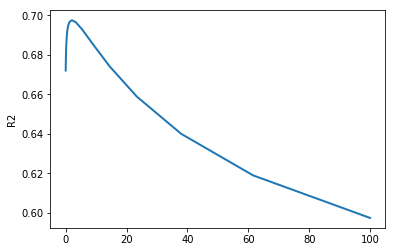

In [1601]:
alpha_values = np.logspace(-2,2,20)
scores = alpha_scores(Ridge, alpha_values, X_train_2, y_train_2)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [1602]:
model_ridge_2 = RidgeCV(alphas=np.logspace(-2,2,20), cv=5)

model_ridge_2.fit(X_train_2, y_train_2)

print('Best alpha:', model_ridge_2.alpha_)

print('Training score:', model_ridge_2.score(X_train_2, y_train_2))

print('Test score:', model_ridge_2.score(X_test_2, y_test_2))

scores = cross_val_score(model_ridge_2, X_train_2, y_train_2, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 2.06913808111479
Training score: 0.7845403226588403
Test score: 0.7560789237176916
Mean cross-validated training score: 0.6963123405969391


#### Lasso

##### Modelling

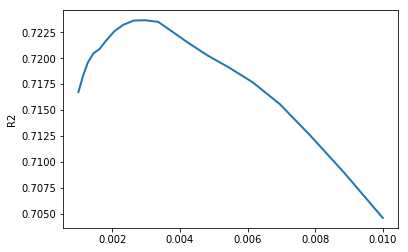

In [1606]:
alpha_values = np.logspace(-3,-2,20)
scores = alpha_scores(Lasso, alpha_values, X_train, y_train)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [1607]:
lasso_model = LassoCV(alphas=np.logspace(-3,-2,30), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model.fit(X_train, y_train)

print('Best alpha:', lasso_model.alpha_)

print('Training score:', lasso_model.score(X_train, y_train))

print('Test score:', lasso_model.score(X_test, y_test))

scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.0030391953823131978
Training score: 0.7920633354046815
Test score: 0.7783767537263766
Mean cross-validated training score: 0.7237116730818608


In [1608]:
lasso_pred = lasso_model.predict(X_test)

In [1609]:
lasso_res = y_test - lasso_pred

In [1739]:
test_lasso_score = mean_squared_error(y_test, lasso_pred)

In [1740]:
test_lasso_score

0.47327680763431834

In [1610]:
from statsmodels.graphics.gofplots import qqplot

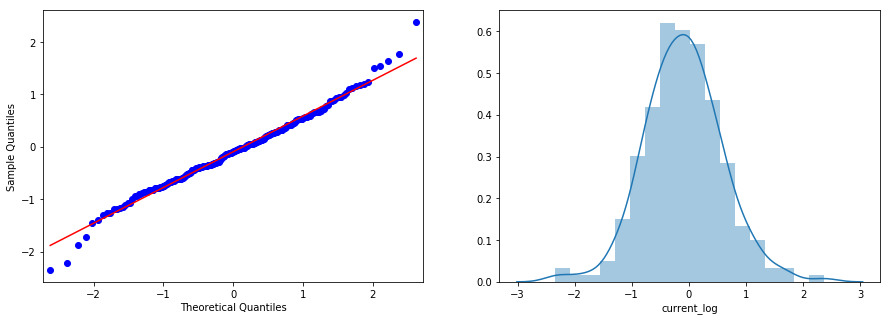

In [1611]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
qqplot(lasso_res, line='s', ax=ax[0]);
sns.distplot(lasso_res, ax=ax[1]);
plt.show()

##### Checking feature importance and filtering a new dataset

In [1613]:
df_coef = pd.DataFrame({'coef': lasso_model.coef_,
                        'variable': X_train.columns,
                        'coef_abs': np.abs(lasso_model.coef_)})

df_coef.sort_values(by='coef_abs', ascending=False).head()

,coef,variable,coef_abs
32,-2.083036,age_group_Plus_35,2.083036
31,-0.806071,age_group_31-34,0.806071
4,-0.800565,league_Bundesliga 2 (GER),0.800565
0,0.677396,team_clas_Top 10,0.677396
69,0.604454,last_rating,0.604454


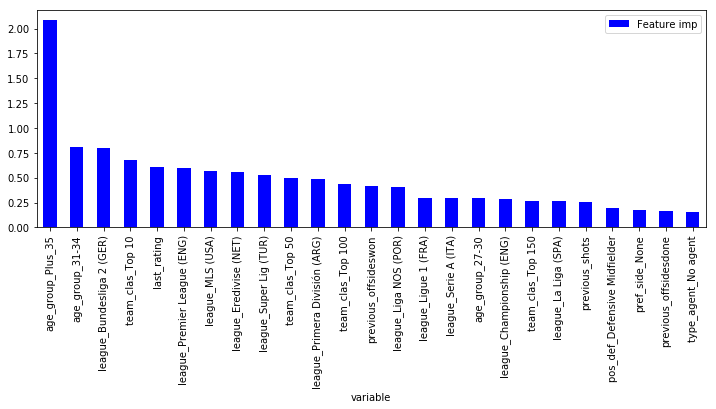

In [1615]:
df_coef.sort_values(by='coef_abs', ascending=False).head(25). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

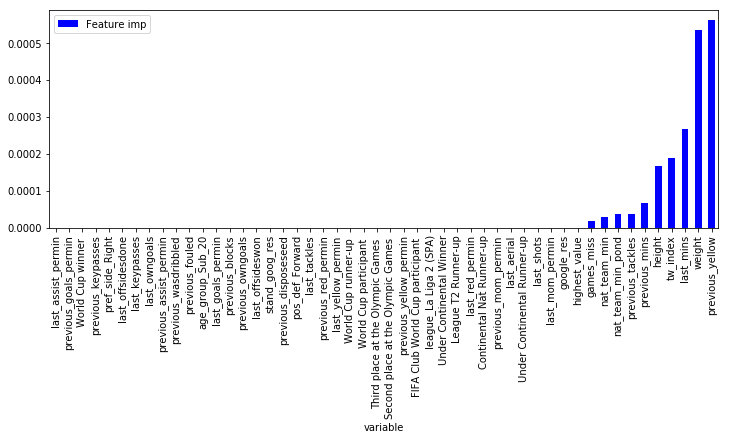

In [1616]:
df_coef.sort_values(by='coef_abs').head(50). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

In [1617]:
df_coef.sort_values(by='coef_abs', ascending=False, inplace=True)

In [1618]:
df_coef['order'] = [x for x in range(1,len(df_coef)+1)]

In [1619]:
shitty_vars = df_coef.variable[df_coef.coef_abs == 0].values

In [1620]:
cool_vars = list(df_coef.variable[~df_coef.variable.isin(shitty_vars)])

In [1621]:
filtered_final_dataset = dum_final.loc[:,cool_vars]

In [1622]:
filtered_final_dataset.reset_index(drop=True,inplace=True)

##### New simple regression on filtered data

In [1625]:
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
filtered_final_dataset, y, test_size = 0.20, random_state=123)

In [1626]:
X_train_filt_std = pd.DataFrame(scaler.fit_transform(X_train_filt),columns=X_train_filt.columns,index=X_train_filt.index)
X_test_filt_std = pd.DataFrame(scaler.transform(X_test_filt),columns=X_train_filt.columns,index=X_test_filt.index)

In [1627]:
test_model = LinearRegression()
test_model.fit(X_train_filt, y_train_filt)

scores = cross_val_score(test_model, X_train_filt, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', test_model.score(X_train_filt, y_train_filt))

print('Test score:', test_model.score(X_test_filt, y_test_filt))

Mean cross-validated training score: 0.728454769693665
Training score: 0.8004992227901726
Test score: 0.7755368203800763


In [1628]:
test_model_std = LinearRegression()
test_model_std.fit(X_train_filt_std, y_train_filt)

scores = cross_val_score(test_model_std, X_train_filt_std, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', test_model_std.score(X_train_filt_std, y_train_filt))

print('Test score:', test_model_std.score(X_test_filt_std, y_test_filt))

Mean cross-validated training score: 0.7284547694699806
Training score: 0.8004992227901726
Test score: 0.7755368203398749


##### New Lasso on filtered data

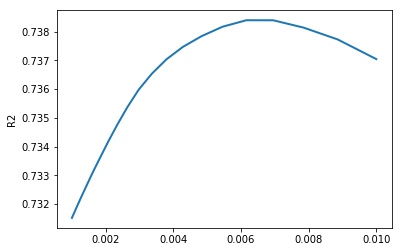

In [1629]:
# Better with standardization

alpha_values = np.logspace(-3,-2,20)
scores = alpha_scores(Lasso, alpha_values, X_train_filt_std, y_train_filt)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [1630]:
lasso_cool_model = LassoCV(alphas=np.logspace(-3,-2,30), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model.fit(X_train_filt_std, y_train_filt)

print('Best alpha:', lasso_model.alpha_)

print('Training score:', lasso_model.score(X_train_filt_std, y_train_filt))

print('Test score:', lasso_model.score(X_test_filt_std, y_test_filt))

scores = cross_val_score(lasso_cool_model, X_train_filt_std, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.0030391953823131978
Training score: 0.7930673942379054
Test score: 0.7808158687584104
Mean cross-validated training score: 0.7118016196845821


#### Trees

In [2164]:
final_basic_tree = DecisionTreeRegressor(random_state=123)

In [2165]:
final_basic_tree_params = {'max_depth': [6],
          'max_features': [108],
          'max_leaf_nodes': [109,110],
          'min_samples_leaf': [2],
          'min_samples_split': [18,19,20]
          }

final_basic_tree_grid = GridSearchCV(
        estimator=final_basic_tree,
        param_grid=final_basic_tree_params, cv=5)

final_basic_tree_grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [6], 'max_features': [108], 'max_leaf_nodes': [109, 110], 'min_samples_leaf': [2], 'min_samples_split': [18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [2166]:
final_basic_tree_grid.best_params_

{'max_depth': 6,
 'max_features': 108,
 'max_leaf_nodes': 109,
 'min_samples_leaf': 2,
 'min_samples_split': 19}

In [2167]:
final_basic_tree_grid.score(X_test_std, y_test)

0.8546389421134577

In [2169]:
final_basic_tree_grid.score(X_train_std, y_train)

0.9269194666238414

In [2184]:
scores = cross_val_score(final_basic_tree_grid, X_train_std, y_train, cv=5)

In [2186]:
scores.mean()

0.8188634532793347

### New dataset only with remaining features after regularization from previous datasets

#### Setting up dataset

The mega dataset was created merging the remaining features after regularization, from both, the teams dataset, and the complete dataset. This ended up being the dataset used throughout the modelling.

In [1645]:
filtered_final_dataset_wlink = filtered_final_dataset.copy()

In [1646]:
final_link_tm.reset_index(inplace=True,drop=True)

In [1647]:
filtered_final_dataset_wlink['link'] = final_link_tm

In [1648]:
mega_dataset = filtered_teams_wlink.merge(filtered_final_dataset_wlink, how='inner', on='link')

In [1649]:
y_look = pd.concat([y,final_link_tm],axis=1)

In [1650]:
y_look = y_look.rename(columns = {'player_link_tm':'link'})

In [1651]:
y_mega = y_look.merge(y_teams_look, how='inner', on='link')

In [1652]:
y_mega.columns

Index(['current_log_x', 'link', 'current_log_y'], dtype='object')

In [1653]:
y_mega.drop('current_log_x',inplace=True,axis=1)

In [1654]:
mega_dataset = mega_dataset.merge(y_mega, how='inner', on='link')

In [1655]:
mega_dataset.reset_index(drop=False,inplace=True)

In [1656]:
mega_links = mega_dataset.pop('link')

In [2132]:
mega_links.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/mega_links.csv',index=False)

In [1657]:
mega_dataset.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/mega_dataset.csv',index=False)


In [1658]:
mega_dataset = pd.read_csv('/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/mega_dataset.csv')

In [1659]:
y_mega = mega_dataset.pop('current_log_y')

In [1660]:
# Checking out shapes just in case

print(mega_dataset.shape)
print(y_mega.shape)
print(mega_links.shape)

(1143, 98)
(1143,)
(1143,)


#### Simple linear regression

In [2134]:
X_train_mega, X_test_mega, y_train_mega, y_test_mega = train_test_split(
mega_dataset, y_mega, test_size = 0.20, random_state=123)

In [2141]:
X_train_mega_std = pd.DataFrame(scaler.fit_transform(X_train_mega),columns=X_train_mega.columns, index=X_train_mega.index)
X_test_mega_std = pd.DataFrame(scaler.transform(X_test_mega),columns=X_test_mega.columns, index=X_test_mega.index)
mega_std = pd.DataFrame(scaler.transform(mega_dataset),columns=mega_dataset.columns, index=mega_dataset.index)


In [2136]:
regresion_mega = LinearRegression()
regresion_mega.fit(X_train_mega_std, y_train_mega)

scores = cross_val_score(regresion_mega, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', regresion_mega.score(X_train_mega_std, y_train_mega))

print('Test score:', regresion_mega.score(X_test_mega_std, y_test_mega))

Mean cross-validated training score: 0.6941990044074281
Training score: 0.7954978211770092
Test score: 0.8113601378628542


#### Lasso

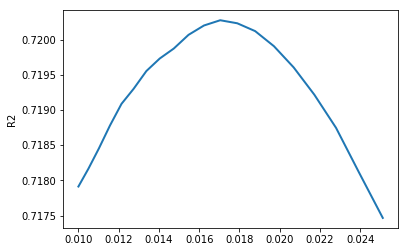

In [2257]:
# Standardization doesn't change anything

alpha_values = np.logspace(-2,-1.6,30)
scores = alpha_scores(Lasso, alpha_values, X_train_mega_std, y_train_mega)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [2260]:
model_lasso_mega = LassoCV(alphas=np.logspace(-2,-1.6,30), cv=5)

model_lasso_mega.fit(X_train_mega_std, y_train_mega)

print('Best alpha:', model_lasso_mega.alpha_)

print('Training score:', model_lasso_mega.score(X_train_mega_std, y_train_mega))

print('Test score:', model_lasso_mega.score(X_test_mega_std, y_test_mega))

scores = cross_val_score(model_lasso_mega, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.017158635894253232
Training score: 0.7761637957757568
Test score: 0.8000885936528762
Mean cross-validated training score: 0.7167327158302463


In [2311]:
filename_lasso = 'lasso.sav'
pickle.dump(model_lasso_mega, open(filename_lasso, 'wb'))

In [1802]:
loaded_model_lasso = pickle.load(open(filename_lasso, 'rb'))
loaded_model_lasso.score(X_test_mega_std, y_test_mega)

0.8005157447787287

#### Lasso without highest value

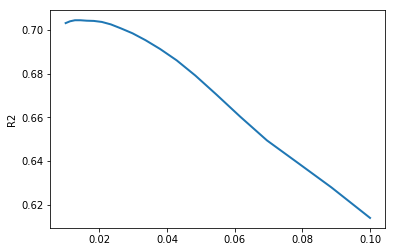

In [1779]:
# Standardization doesn't change anything

alpha_values = np.logspace(-2,-1,20)
scores = alpha_scores(Lasso, alpha_values, X_train_w_highest, y_train_mega)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [1780]:
model_lasso_mega = RidgeCV(alphas=np.logspace(-2,-1,20), cv=5)

model_lasso_mega.fit(X_train_w_highest, y_train_mega)

print('Best alpha:', model_lasso_mega.alpha_)

print('Training score:', model_lasso_mega.score(X_train_w_highest, y_train_mega))

print('Test score:', model_lasso_mega.score(X_test_w_highest, y_test_mega))

scores = cross_val_score(model_lasso_mega, X_train_w_highest, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.01
Training score: 0.7749700769977425
Test score: 0.7978180181293469
Mean cross-validated training score: 0.6758085970338936


#### Ridge

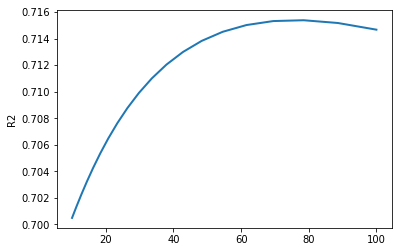

In [1782]:
# Standardization makes it a little worst

alpha_values = np.logspace(1,2,20)
scores = alpha_scores(Ridge, alpha_values, X_train_mega_std, y_train_mega)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [1783]:
model_ridge_mega = RidgeCV(alphas=np.logspace(1,2,20), cv=5)

model_ridge_mega.fit(X_train_mega_std, y_train_mega)

print('Best alpha:', model_ridge_mega.alpha_)

print('Training score:', model_ridge_mega.score(X_train_mega_std, y_train_mega))

print('Test score:', model_ridge_mega.score(X_test_mega_std, y_test_mega))

scores = cross_val_score(model_ridge_mega, X_train_mega, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 78.47599703514611
Training score: 0.7860791833368175
Test score: 0.8050695856797669
Mean cross-validated training score: 0.7003970049163508


In [462]:
pred_ridge_mega = model_ridge_mega.predict(X_train_mega)
ridge_res_mega = [np.abs(x-y) for x,y in zip(y_train_mega, pred_ridge_mega)]

In [463]:
np.max(ridge_res_mega)

2.391628766962711

#### Trees

In [1673]:
basic_tree = DecisionTreeRegressor(random_state=123)

In [1674]:
basic_tree.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [1687]:
basic_tree_params = {'max_depth': [7],
          'max_features': [88],
          'max_leaf_nodes': [65],
          'min_samples_leaf': [3],
          'min_samples_split': [18]
          }

basic_tree_grid = GridSearchCV(
        estimator=basic_tree,
        param_grid=basic_tree_params, cv=5)

basic_tree_grid.fit(X_train_mega_std, y_train_mega)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7], 'max_features': [88], 'max_leaf_nodes': [64, 65, 66], 'min_samples_leaf': [3], 'min_samples_split': [18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1686]:
basic_tree_grid.best_params_

{'max_depth': 7,
 'max_features': 88,
 'max_leaf_nodes': 65,
 'min_samples_leaf': 3,
 'min_samples_split': 18}

In [1688]:
basic_tree_grid.score(X_train_mega_std, y_train_mega)

0.9259086564526284

In [1689]:
basic_tree_grid.score(X_test_mega_std, y_test_mega)

0.8357400757244058

In [1690]:
scores = cross_val_score(basic_tree_grid, X_train_mega_std, y_train_mega, cv=5)
scores.mean()

0.8264403632859187

#### Tree with bagging [BEST MODEL]

In [2142]:
# Saving final datasets used to train and test just in case
X_train_mega_std.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/X_train_mega_std',index=False)
X_test_mega_std.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/X_test_mega_std',index=False)
X_train_mega.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/X_train_mega',index=False)
X_test_mega.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/X_test_mega',index=False)
y_train_mega.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/y_train_mega',index=False)
y_test_mega.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/y_test_mega',index=False)
mega_std.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Train-test_datasets/mega_std',index=False)

In [1698]:
tree_to_bag = DecisionTreeRegressor(random_state=123)

In [1726]:
bagging_tree = BaggingRegressor(base_estimator=tree_to_bag, random_state=1, n_estimators=2000)

In [1753]:
bagging_tree_params = {'base_estimator__max_depth': [16,17,18],
                       'base_estimator__max_features': [0.85,0.9],
                       'base_estimator__max_leaf_nodes': [94],
                       'base_estimator__min_samples_leaf': [1],
                       'base_estimator__min_samples_split': [10],
                       #'bootstrap': [True,False],
                       #'bootstrap_features': [True,False],
                       'max_features': [1.0],
                       'max_samples': [1.0]}
          

bagging_tree_grid = GridSearchCV(
        estimator=bagging_tree,
        param_grid=bagging_tree_params, cv=3)

bagging_tree_grid.fit(X_train_mega_std, y_train_mega)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
       ...estimators=2000, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__max_depth': [16, 17, 18], 'base_estimator__max_features': [0.85, 0.9], 'base_estimator__max_leaf_nodes': [94], 'base_estimator__min_samples_leaf': [1], 'base_estimator__min_samples_split': [10], 'max_features': [1.0], 'max_samples': [1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1725]:
bagging_tree_grid.best_params_

{'base_estimator__max_depth': 17,
 'base_estimator__max_features': 0.85,
 'base_estimator__max_leaf_nodes': 94,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 10,
 'max_features': 1.0,
 'max_samples': 1.0}

In [1730]:
import pickle
filename = 'bagging_tree.sav'
pickle.dump(bagging_tree_grid, open(filename, 'wb'))

In [1728]:
bagging_tree_grid.best_estimator_.score(X_test_mega_std, y_test_mega)

0.887395335350463

In [1729]:
bagging_tree_grid.best_estimator_.score(X_train_mega_std, y_train_mega)

0.9646604676485424

In [2015]:
scores = cross_val_score(bagging_tree_grid, X_train_mega_std, y_train_mega, cv=5)
scores.mean()

0.866463231099224

In [1732]:
bagging_tree_test_pred = bagging_tree_grid.best_estimator_.predict(X_test_mega_std)
bagging_tree_train_pred = bagging_tree_grid.best_estimator_.predict(X_train_mega_std)

In [1741]:
train_mse_score = mean_squared_error(y_train_mega, bagging_tree_train_pred)
test_mse_score = mean_squared_error(y_test_mega, bagging_tree_test_pred)

In [1734]:
test_mse_score

0.25543246127974284

##### Saving dataset with predictions as this was the best model

In [1744]:
y_tot_mega = pd.concat([y_test_mega,y_train_mega])
y_tot_mega.sort_index(axis=0,inplace=True)

In [1745]:
X_tot_mega = pd.concat([X_test_mega_std,X_train_mega_std])
X_tot_mega.sort_index(axis=0,inplace=True)

In [1746]:
pred_tot_mega = bagging_tree_grid.predict(X_tot_mega)

In [1747]:
mega_final = pd.concat([y_tot_mega, mega_links],axis=1)
mega_final['pred'] = pred_tot_mega

In [1748]:
# Creating column for currrent value
mega_final['current'] = round(np.exp(mega_final['current_log_y']))

# Creating column for predictions without log transform
mega_final['pred_real'] = round(np.exp(mega_final['pred']))

In [1749]:
mega_final=mega_final.rename(columns = {'link':'player_link_tm'})

In [2029]:
mega_final_merged = mega_final.merge(complete_dataset,on='player_link_tm',how='inner')
mega_final_merged['google_res'] = X_tot_mega.google_res

In [2030]:
# Saving dataset to be used later
mega_final_merged.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/Final_with_predictions.csv',index=False)

### Trying some robust models

#### Ranscac Sklearn

In [1949]:
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         is_data_valid=None, is_model_valid=None, 
                         loss='absolute_loss', max_skips=10, 
                         max_trials=100, min_samples=250, 
                         random_state=123, residual_threshold=5, 
                         stop_n_inliers=1000, stop_score=1)

# HuberRegressor with RANSAC shit
# TheilSenRegressor with RANSAC around 0.35

In [1950]:
ransac.fit(X_train_mega_std, y_train_mega)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=10, max_trials=100, min_samples=250, random_state=123,
        residual_threshold=5, stop_n_inliers=1000, stop_probability=0.99,
        stop_score=1)

In [1951]:
ransac.score(X_train_mega_std,y_train_mega)

0.7954978211770092

In [1952]:
ransac.score(X_test_mega_std,y_test_mega)

0.8113601378628541

In [1953]:
scores = cross_val_score(ransac, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Mean cross-validated training score: 0.611989184162615


In [1954]:
ransac_pred = ransac.estimator_.predict(X_test_mega_std)

In [1955]:
ransac_res = y_test_mega - ransac_pred

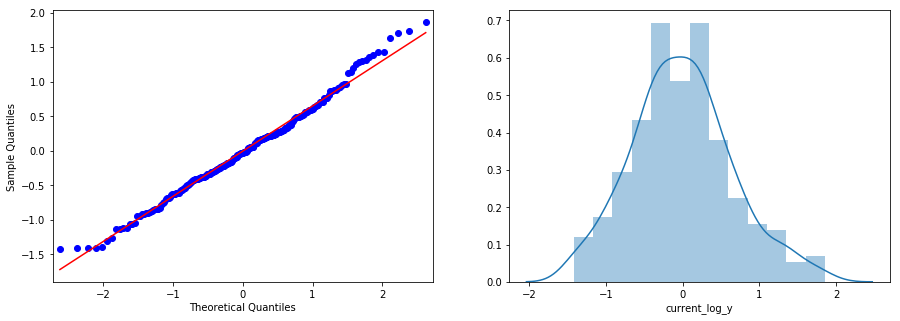

In [1956]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
qqplot(ransac_res, line='s', ax=ax[0]);
sns.distplot(ransac_res, ax=ax[1]);
plt.show()

#### Huber Regressor statsmodel

In [1957]:
# Trying Huber Regressor with statsmodel and severa alpha values, but none reaches a good r2 score

for x in list(np.linspace(0.01, 1, 20)):
    huber_t = sm.OLS(y_train_mega, X_train_mega)
    hub_results = huber_t.fit_regularized(alpha=x)
    mega_pred = hub_results.predict(X_test_mega)
    print(r2_score(y_test_mega, mega_pred))

0.6159239757487188
0.5485370197158412
0.5475697645720141
0.555715274512655
0.5594507880221298
0.5611109914216772
0.5524405684808122
0.519039990406031
0.5584947652423555
0.5427736899706159
0.5503235187169618
0.5298788942808371
0.5214897314445296
0.4811680222234409
0.5276354097416505
0.48879407312180223
0.37688090788866546
0.3560513803488917
0.44509848307344635
0.41497633662477396


#### Huber Sklearn with Grid Search

In [1959]:
hub_model = HuberRegressor(max_iter=5000)

In [2002]:
huber_params = {
    'alpha': [110],
    'epsilon': [36.6],
    'fit_intercept': [True],
}

huber_grid = GridSearchCV(
        estimator=hub_model,
        param_grid=huber_params, cv=5)

huber_grid.fit(X_train_mega_std, y_train_mega)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=10000,
        tol=1e-05, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [110], 'epsilon': [36.6], 'fit_intercept': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [2003]:
huber_grid.best_estimator_

HuberRegressor(alpha=110, epsilon=36.6, fit_intercept=True, max_iter=10000,
        tol=1e-05, warm_start=False)

In [2005]:
huber_grid.score(X_train_mega_std,y_train_mega)

0.7864290249561654

In [2004]:
huber_grid.score(X_test_mega_std, y_test_mega)

0.8053959584884288

In [2194]:
scores = cross_val_score(huber_grid, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Mean cross-validated training score: 0.7152310907760976


In [2007]:
feature_importance = pd.DataFrame(huber_grid.best_estimator_.coef_,
                                  index=X_train_mega_std.columns,
                                  columns=['Coef'])

In [2010]:
feature_importance.sort_values(by='Coef',ascending=False).head()

,Coef
highest_value,0.403308
previous_mins,0.246701
last_mins,0.235750
last_rating,0.188748
previous_shots,0.180550


In [593]:
theil_model = TheilSenRegressor(max_iter=10000, n_jobs=3)

In [592]:
list(theil_model.get_params().keys())

['copy_X',
 'fit_intercept',
 'max_iter',
 'max_subpopulation',
 'n_jobs',
 'n_subsamples',
 'random_state',
 'tol',
 'verbose']

In [606]:
theil_params = {
    'verbose': [True],
    'tol': [0.1,1,2,3,4],
    'fit_intercept': [True]
}

theil_grid = GridSearchCV(
        estimator=theil_model,
        param_grid=theil_params, cv=5)

theil_grid.fit(X_train_mega, y_train_mega)

Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.3s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.1s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.1s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.2s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.2s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006678065873253702
Number of samples: 914
Tolerable outliers: 6
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=10000,
         max_subpopulation=10000, n_jobs=3, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'verbose': [True], 'tol': [0.1, 1, 2, 3, 4], 'fit_intercept': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [607]:
theil_grid.best_estimator_

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=10000,
         max_subpopulation=10000, n_jobs=3, n_subsamples=None,
         random_state=None, tol=1, verbose=True)

In [608]:
theil_grid.score(X_test_mega_std, y_test_mega)

-14.982066964607753

### Trying with PCA

#### Intro EDA

In [1027]:
X_std = scaler.fit_transform(X_train_mega_std)

In [1028]:
pca = PCA(n_components=92)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=92, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

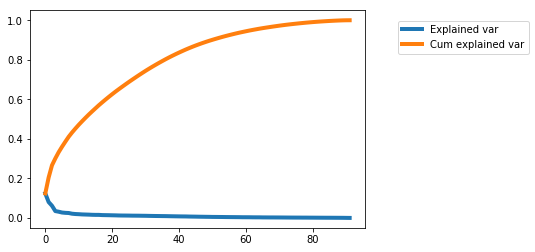

In [1029]:
plt.plot(pca.explained_variance_ratio_, lw=4, label='Explained var')
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=4, label='Cum explained var')
plt.legend(loc=(1.1,0.8))
plt.show()

In [1030]:
print("Number of principal components:\t", pca.n_components_)
print("Explained variance ratio:\t", np.round(pca.explained_variance_ratio_, 3))
print('Explained variance cum"\t', np.cumsum(np.round(pca.explained_variance_ratio_,3)))
      

Number of principal components:	 92
Explained variance ratio:	 [0.124 0.08  0.062 0.035 0.032 0.027 0.026 0.025 0.021 0.02  0.019 0.018
 0.017 0.017 0.016 0.016 0.016 0.014 0.014 0.014 0.013 0.013 0.013 0.012
 0.012 0.012 0.012 0.011 0.011 0.011 0.011 0.01  0.01  0.01  0.01  0.009
 0.009 0.009 0.009 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.006 0.006
 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.   ]
Explained variance cum"	 [0.124 0.204 0.266 0.301 0.333 0.36  0.386 0.411 0.432 0.452 0.471 0.489
 0.506 0.523 0.539 0.555 0.571 0.585 0.599 0.613 0.626 0.639 0.652 0.664
 0.676 0.688 0.7   0.711 0.722 0.733 0.744 0.754 0.764 0.774 0.784 0.793
 0.802 0.811 0.82  0.828 0.836 0.844 0.852 0.859 0.866 0.873 0.879 0.885
 0.891 0.897 0.902 0.907 0.912 0.917 0.922 0.926 0.93  0.93

#### Finding if it is worth it to go deeper with PCA

##### Testing with Ridge

In [1796]:
def best_pca_ridge_choser(data,y):
    scores = []
    for x in range(1,data.shape[1]):
        pca_ = PCA(n_components=x)
        pca_.fit(data)
        X_pca = pca_.transform(data)
        ridge_pca = RidgeCV(cv=5)
        ridge_pca.fit(X_pca, y)
        score = ridge_pca.score(X_pca, y)
        scores.append(score)
    return scores

In [1797]:
ridge_scores = best_pca_ridge_choser(X_train_mega_std,y_train_mega)

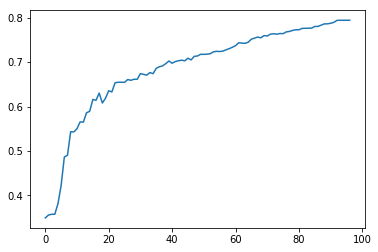

In [1798]:
# PCA using linear regression reaches its best scores when using the same number of components as features we have
# In conclusion: not worth using it 

plt.plot(ridge_scores)

##### Test with trees

In [1418]:
def best_tree_choser(data,y,start,end,ran):
    scores = []
    best_score = 0
    return_model = 'nada'
    best_pca = 0
    for x in range(start,end,ran):
        pca_ = PCA(n_components=x)
        pca_.fit(data)
        X_pca = pca_.transform(data)
        
        tree= DecisionTreeRegressor(random_state=123)
        tree_params = {'max_depth': [6,8,12],
          'max_features': np.linspace(0.8,1.0,3),
          'max_leaf_nodes': [40,50,60],
          'min_samples_leaf': [1,2],
          'min_samples_split': [2,5,10]
          }
        
        basic_tree_grid = GridSearchCV(
        estimator=tree,
        param_grid=tree_params, cv=3)
        
        basic_tree_grid.fit(X_pca, y)
        score = basic_tree_grid.score(X_pca, y)
        scores.append(score)
        if score > best_score:
            best_score = score
            return_model = basic_tree_grid
            best_pca = x
    return scores, return_model, best_pca

In [1791]:
tree_scores, best_model, best_pca = best_tree_choser(X_train_mega_std,y_train_mega,20,92,4)

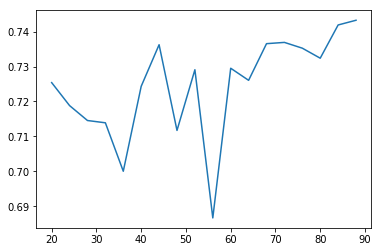

In [2362]:
# PCA using decision trees also reaches its best scores when using the same number of components as features we have
# In conclusion: not worth using it either

plt.plot(range(20,92,4),tree_scores)

In [1793]:
best_model

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [6, 8, 12], 'max_features': array([0.8, 0.9, 1. ]), 'max_leaf_nodes': [40, 50, 60], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1794]:
best_model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=0.8,
           max_leaf_nodes=40, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')